<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/main/TP_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP: K-Means Clustering


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 


Lien Github:
https://github.com/BillTanekeu/TP-TPE-INF-3236-Groupe-8


##Les 5 étapes de l'algorithme de clustering K-means
Étape 1. Choisissez au hasard k points de données comme centroïdes initiaux.

Étape 2. Trouvez la distance (distance euclidienne pour notre objectif) entre chaque point de données de notre ensemble d'entraînement avec les k centroïdes.

Étape 3. Attribuez maintenant chaque point de données au centroïde le plus proche en fonction de la distance trouvée.

Étape 4. Mettez à jour l'emplacement du centroïde en prenant la moyenne des points dans chaque groupe de clusters.

Étape 5. Répétez les étapes 2 à 4 jusqu'à ce que nos centroïdes ne changent pas.

**np.random.choice** choisir un échantillons aléatoire dans un ensemble. l'argument replace = False empêche qu'un même element soit sélectionné plus d'une fois.

**cdist** Calcul la distance entre chaque paire des deux collections d'entrées.

**PCA** Analyse en composantes principales (ACP).
l' argument 2 est Nombre de composants à conserver. 

Réduction de la dimensionnalité linéaire à l'aide de la décomposition en valeurs singulières des données pour les projeter dans un espace de dimension inférieure. 

**np.unique** Trouver les éléments uniques d'un tableau.

**plt.scatter(x,y)** Un nuage de points de y par rapport à x avec une taille et/ou une couleur de marqueur variable.





In [19]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 

In [20]:

#implémentation des étapes précédentes
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    # selection des centres (aleatoirement)
    centroids = x[idx, :] #Etape 1
     
    #trouver la distance entre les centroïdes et tous les points de données
    distances = cdist(x, centroids ,'euclidean') #Etape 2
     
    #Centre de gravité avec la distance minimale
    points = np.array([np.argmin(i) for i in distances]) #Etape 3
     
    #Répéter les étapes ci-dessus pour un nombre défini d'itérations
    #Etape 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Mise à jour des centroïdes en prenant la moyenne du cluster auquel il appartient
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Centroïdes mis à jour
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 


##Test des clusters K-Means
Nous utiliserons le jeu de données digits (intégré au module sklearn) pour tester notre fonction.

#Jeu de données
Chaque point de données est une image 8x8 d'un chiffre.
L'image étant aplatie on optient donc 64 variables.

les classes dix

Échantillons par classe ~180

Échantillons totaux = 1797

Dimensionnalité  = 64

Caractéristiques entiers 0-16

In [21]:
#charger les données
data = load_digits().data

In [22]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
#Transformation des données avec L'ACP
#l' argument 2 est Nombre de composants à conserver. 

pca = PCA(2)
df = pca.fit_transform(data)

In [24]:
#Execution de notro fonction kmeans avec 10 goupes et 1000 itérations
label = kmeans(df,10,1000)
 

In [25]:
label

array([2, 4, 8, ..., 8, 9, 7])

In [26]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

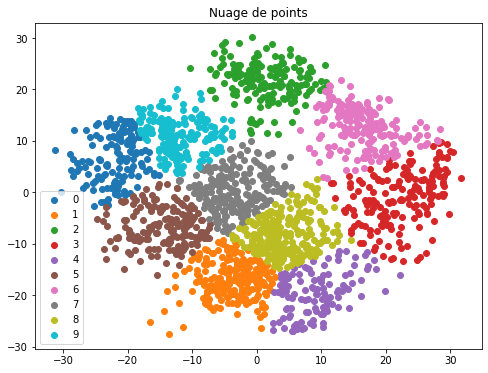

In [30]:

#Visualisation des résultats
#**np.unique** Trouve les éléments uniques d'un tableau.
plt.figure(figsize = (8,6))

u_labels = np.unique(label)
for i in u_labels:
    # Nuage de points
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.title("Nuage de points")
plt.legend()
plt.show()
